<a href="https://colab.research.google.com/github/Yoth999/AI-builder-snake-verification/blob/main/SnakeIdentifyAi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Install pythorch, fastbook and gdown

In [ ]:
#fastai
!pip install -q fastbook==0.0.29


!pip install gdown

exit()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 23.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.3/519.3 kB 27.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 35.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 19.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 55.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 57.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 66.0 MB/s eta 0:00:00


In [10]:
exit()

Download images from google as .zip file

In [ ]:
import gdown
import shutil


file_id = '1CelvG6rb9jU3kxXjZkFH2Mn3vCTtYufG'
output = 'output_filename.zip'
gdown.download(f'https://drive.google.com/uc?id={file_id}', output, quiet=False)



Downloading...
From: https://drive.google.com/uc?id=1CelvG6rb9jU3kxXjZkFH2Mn3vCTtYufG
To: /content/output_filename.zip
100%|██████████| 1.01G/1.01G [00:07<00:00, 140MB/s]


'output_filename.zip'

extract images to images/ path

In [ ]:

import os
import zipfile

zip_file_path = "output_filename.zip"
extracted_folder = "images"

# Create the target directory if it doesn't exist
if not os.path.exists(extracted_folder):
    os.makedirs(extracted_folder)

# Open the ZIP file and extract its contents
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder)

print("Extraction complete.")
print("all extracted files are put in 'images' directory")

Extraction complete.
all extracted files are put in 'images' directory


create valid mini

In [ ]:
!rm -r images/snakes/valid_mini
!mkdir images/snakes/valid_mini


import glob
import shutil


valid_folders = glob.glob('images/snakes/valid/*')
valid_fnames = []
for folder in valid_folders:
    valid_images = glob.glob(f'{folder}/*')[:30]
    for fname in valid_images:
        if os.path.exists(fname):  # Check if the source file exists
            valid_fnames.append(fname)

for i in range(26):
    dest_dir = f'images/snakes/valid_mini/{str(i).zfill(2)}'
    os.makedirs(dest_dir, exist_ok=True)  # Create the destination directory

for fname in valid_fnames:
    folder_name = fname.split("/")[-2]
    dest_path = f'images/snakes/valid_mini/{folder_name}/{os.path.basename(fname)}'
    if not os.path.exists(dest_path):  # Check if the destination file already exists
        shutil.copyfile(fname, dest_path)


rm: cannot remove 'images/snakes/valid_mini': No such file or directory


rename folders


*_venomous* is a venomous snake

*_lnon-venomous* is a low venom snake (not dangerous to human)

*_non-venomous* is a non venomous snake

In [ ]:
import os

snakes = [
    'gpv_venomous', 'mpv_venomous', 'pv_venomous', 'tv_venomous', 'krait_venomous', 'cobra_venomous', 'lgcoral_venomous', 'acoral_venomous',
    'achor_non-venomous', 'bronz_lnon-venomous', 'brown_lnon-venomous', 'collar_lnon-venomous', 'cat_lnon-venomous',
    'kukri_lnon-venomous', 'mocv_lnon-venomous', 'mud_lnon-venomous', 'sand_lnon-venomous', 'whip_lnon-venomous',
    'racer_lnon-venomous', 'tree_lnon-venomous', 'WaBs_lnon-venomous', 'cylin_non-venomous',
    'parea_non-venomous', 'pytho_non-venomous', 'typl_non-venomous', 'xeno_non-venomous'
]

train_directory = "images/snakes/train"
valid_directory = "images/snakes/valid_mini"

for i, snake_name in enumerate(snakes):
    new_train_directory = os.path.join(train_directory, f"{str(i).zfill(2)}_{snake_name}")
    os.rename(os.path.join(train_directory, f"{str(i).zfill(2)}"), new_train_directory)

    new_valid_directory = os.path.join(valid_directory, f"{str(i).zfill(2)}_{snake_name}")
    os.rename(os.path.join(valid_directory, f"{str(i).zfill(2)}"), new_valid_directory)


training with fastbook

In [1]:
from fastbook import *

In [5]:
dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=GrandparentSplitter(valid_name='valid_mini'),
    get_y=parent_label,
    batch_tfms=aug_transforms(size=600),
    item_tfms=Resize(600)
)
dls = dblock.dataloaders('images/snakes/', bs=20)


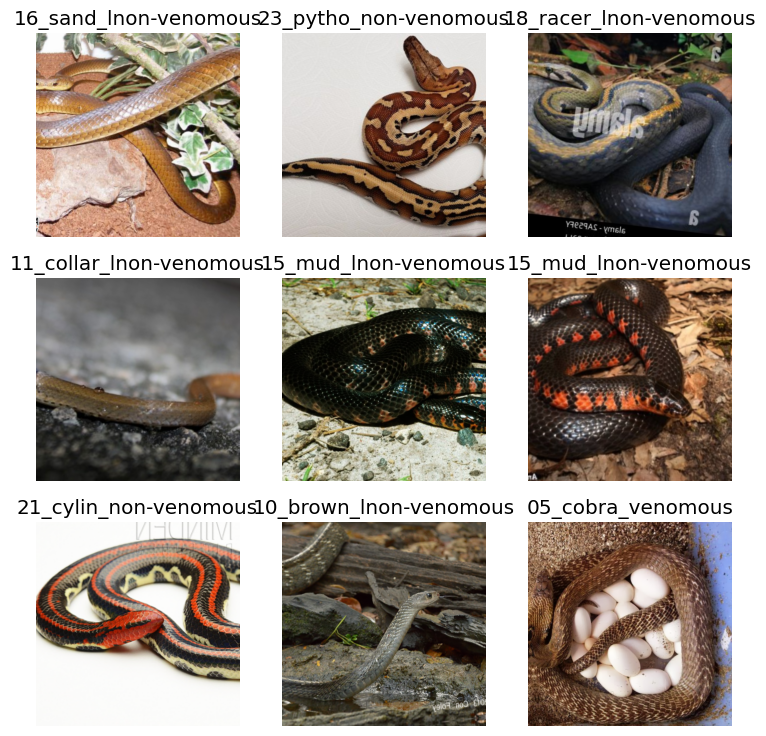

In [ ]:
dls.train.show_batch(max_n=9,nrows=3)

In [6]:
learn = cnn_learner(dls, resnet50, metrics=accuracy)
learn.fine_tune(epochs=20, freeze_epochs=0, base_lr=2e-3)

epoch,train_loss,valid_loss,accuracy,time
0,2.007249,1.593139,0.576923,06:45
1,1.211707,1.254067,0.657692,06:49
2,1.006990,1.244100,0.696154,06:50
3,0.882191,1.331084,0.689744,06:50
4,0.776096,1.302484,0.691026,06:49
5,0.719507,1.173961,0.737179,06:50
6,0.629106,1.214307,0.721795,06:50
7,0.549973,1.109360,0.758974,06:50
8,0.422419,1.135986,0.761538,06:49
9,0.296426,1.116286,0.757692,06:49


In [ ]:

learn.show_results() #true label - บน; prediction - ล่าง

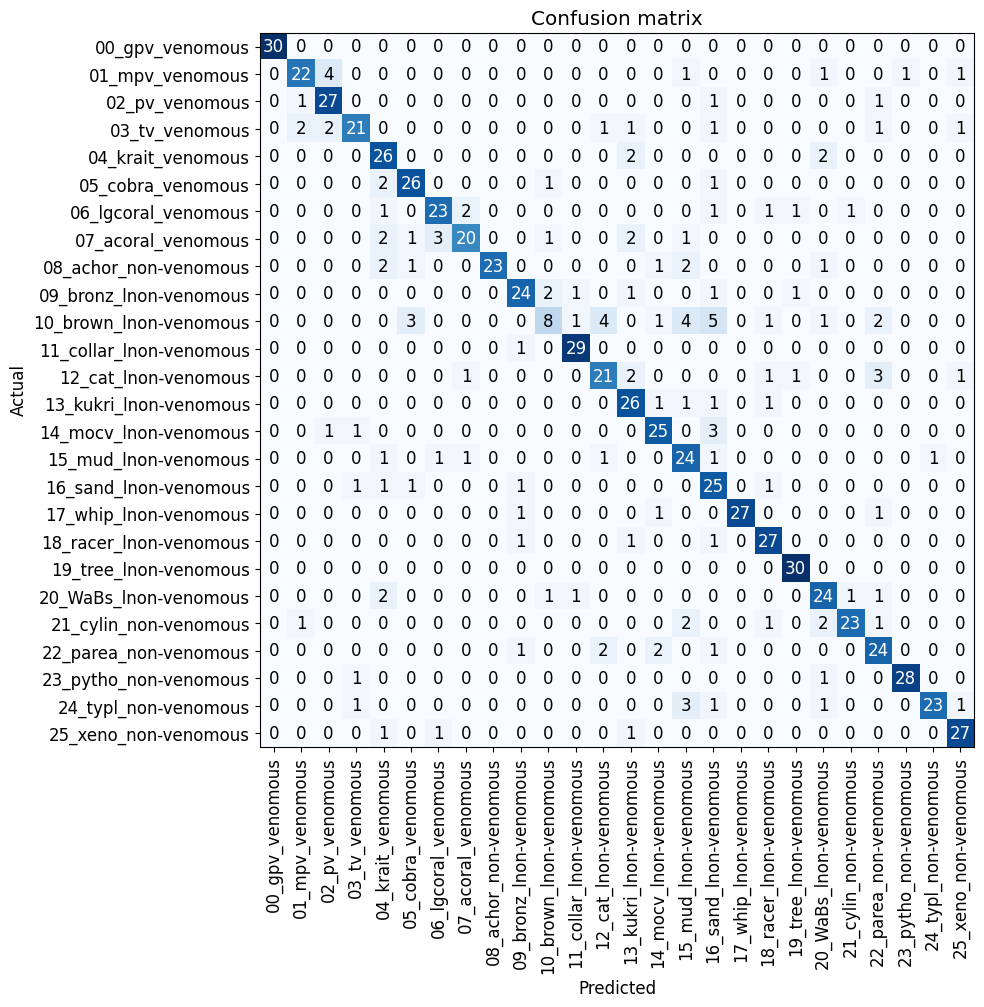

In [8]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(10,10))

In [9]:
interp.print_classification_report()

                         precision    recall  f1-score   support

        00_gpv_venomous       1.00      1.00      1.00        30
        01_mpv_venomous       0.85      0.73      0.79        30
         02_pv_venomous       0.79      0.90      0.84        30
         03_tv_venomous       0.84      0.70      0.76        30
      04_krait_venomous       0.68      0.87      0.76        30
      05_cobra_venomous       0.81      0.87      0.84        30
    06_lgcoral_venomous       0.82      0.77      0.79        30
     07_acoral_venomous       0.83      0.67      0.74        30
  08_achor_non-venomous       1.00      0.77      0.87        30
 09_bronz_lnon-venomous       0.83      0.80      0.81        30
 10_brown_lnon-venomous       0.62      0.27      0.37        30
11_collar_lnon-venomous       0.91      0.97      0.94        30
   12_cat_lnon-venomous       0.72      0.70      0.71        30
 13_kukri_lnon-venomous       0.72      0.87      0.79        30
  14_mocv_lnon-venomous 

saving the AI model as pickle

In [11]:
import pickle

# Assuming 'learn' is your fastai learner object containing the trained model
model = learn.model

# Save the model as a .pkl file
with open('my_model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [12]:
from google.colab import files
files.download('my_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>